In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv("./train.csv")
df = df.drop(['url', 'timedelta'], axis=1)
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,...,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000
mean,10.396090,546.736560,0.552612,1.003058,0.693278,10.873120,3.284692,4.553271,1.255021,4.548455,...,0.095348,0.757242,-0.259586,-0.521935,-0.107494,0.280653,0.072275,0.342450,0.155627,3364.264386
std,2.117283,472.670058,3.935691,5.848093,3.649376,11.375126,3.851006,8.372558,4.112758,0.844425,...,0.071104,0.248184,0.127366,0.289919,0.094823,0.323644,0.265180,0.188618,0.226548,10742.884480
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,247.000000,0.471080,1.000000,0.625791,4.000000,1.000000,1.000000,0.000000,4.478168,...,0.050000,0.600000,-0.328359,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,945.000000
50%,10.000000,410.000000,0.538784,1.000000,0.690476,7.000000,3.000000,1.000000,0.000000,4.664000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608871,1.000000,0.754717,14.000000,4.000000,4.000000,1.000000,4.854701,...,0.100000,1.000000,-0.187226,-0.300000,-0.050000,0.500000,0.142857,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,690400.000000


In [3]:
# Let's just make sure there is no missing values in the dataset.
# As we can see, we do not have missing values in any of the dataset features.
df.isnull().mean()

n_tokens_title                   0.0
n_tokens_content                 0.0
n_unique_tokens                  0.0
n_non_stop_words                 0.0
n_non_stop_unique_tokens         0.0
num_hrefs                        0.0
num_self_hrefs                   0.0
num_imgs                         0.0
num_videos                       0.0
average_token_length             0.0
num_keywords                     0.0
data_channel_is_lifestyle        0.0
data_channel_is_entertainment    0.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
kw_min_min                       0.0
kw_max_min                       0.0
kw_avg_min                       0.0
kw_min_max                       0.0
kw_max_max                       0.0
kw_avg_max                       0.0
kw_min_avg                       0.0
kw_max_avg                       0.0
kw_avg_avg                       0.0
self_reference_min_shares        0.0
s

In [4]:
# Sepparate the target data from
y = df[['shares']].values
X = df.drop(['shares'], axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

In [9]:
def outlier_removal(feature, col):
    inter_quant_range = feature.quantile(0.75) -  feature.quantile(0.25)
    lower_bound = feature.quantile(0.25) - (inter_quant_range * 1.5)
    upper_bound = feature.quantile(0.75) + (inter_quant_range * 1.5)
    feature.loc[feature[col] > upper_bound.values[0], col] = upper_bound.values[0]
    feature.loc[feature[col] < lower_bound.values[0], col] = lower_bound.values[0]
    return feature

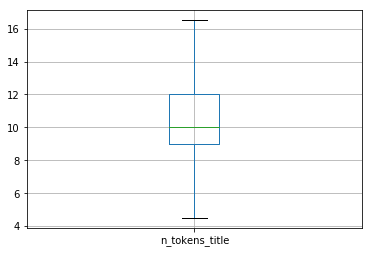

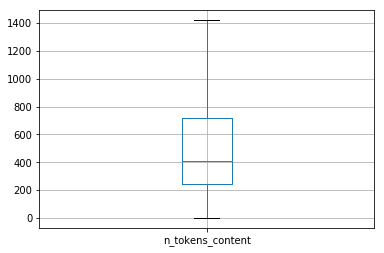

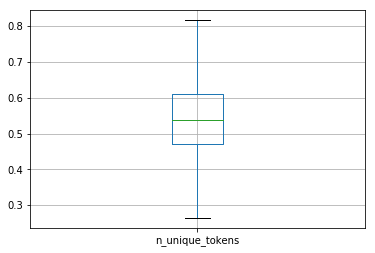

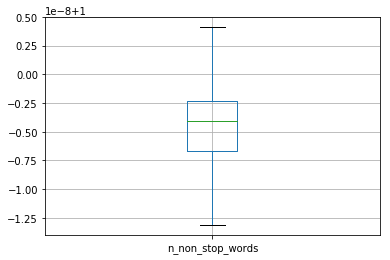

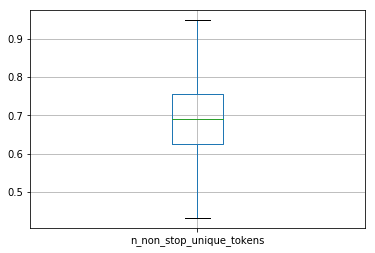

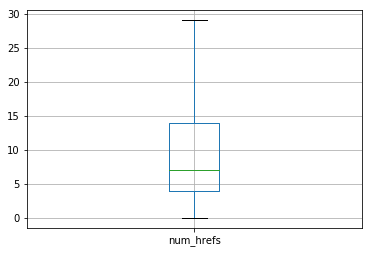

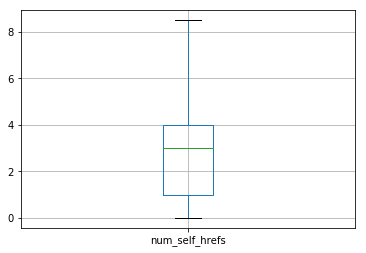

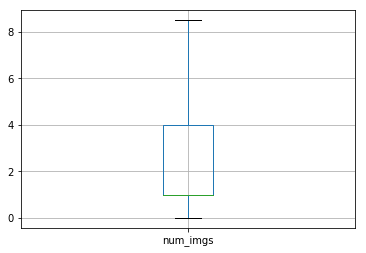

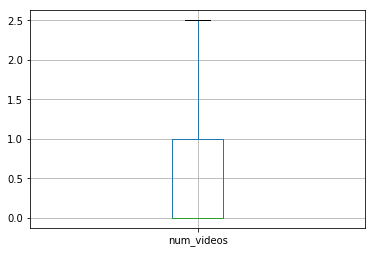

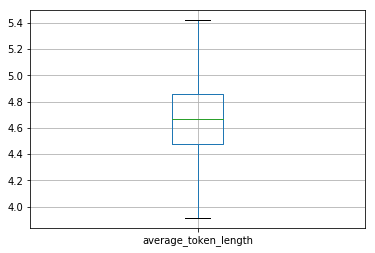

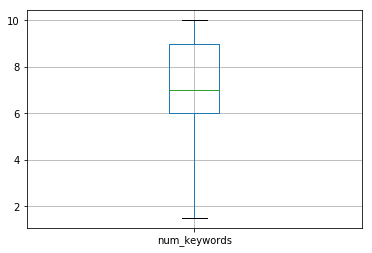

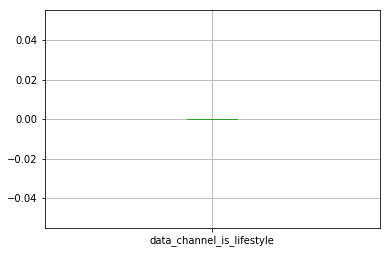

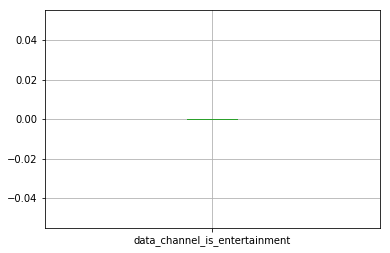

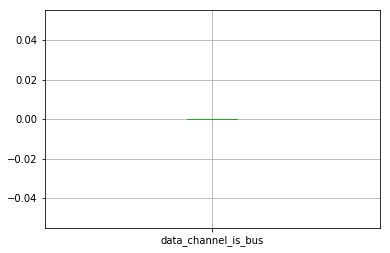

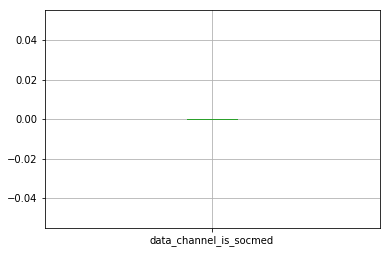

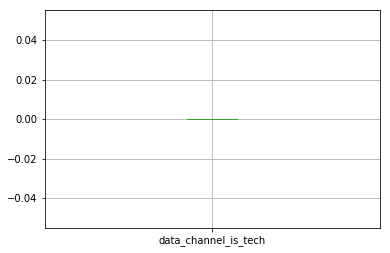

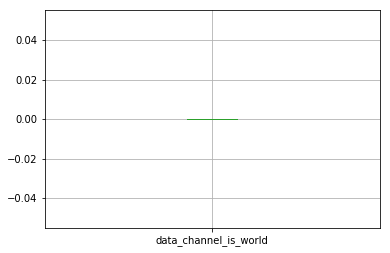

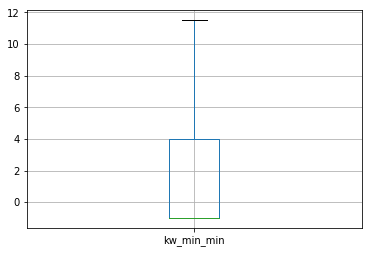

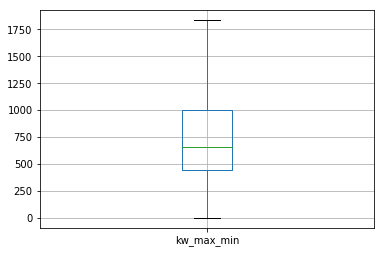

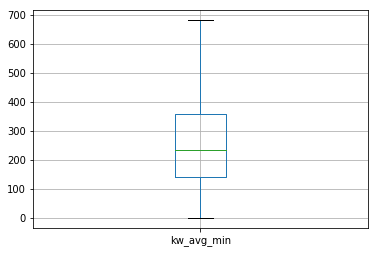

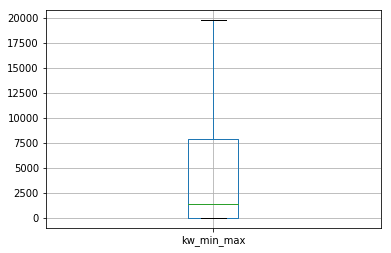

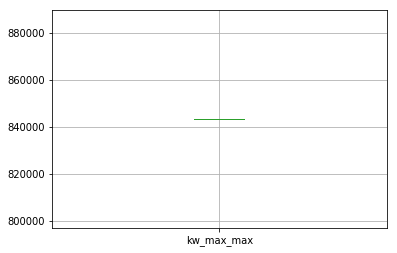

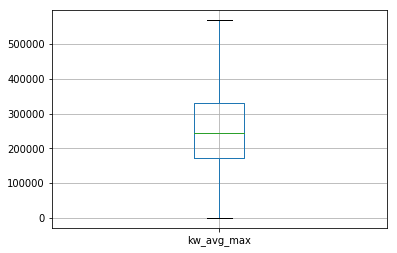

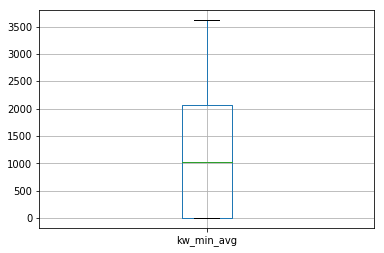

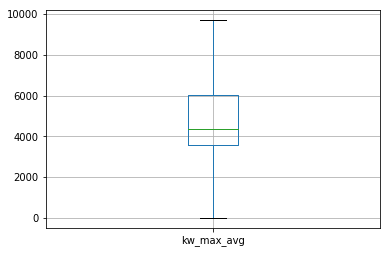

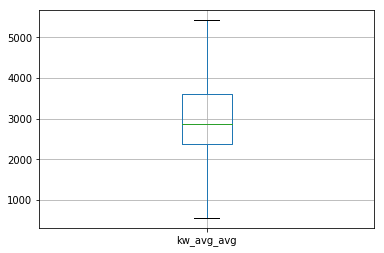

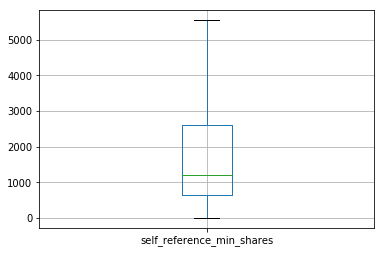

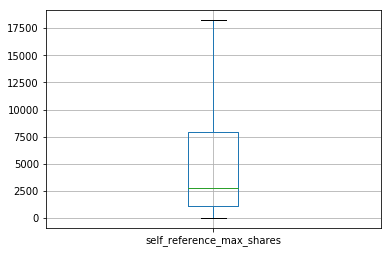

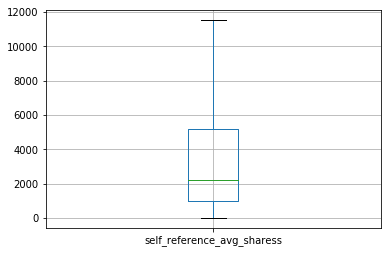

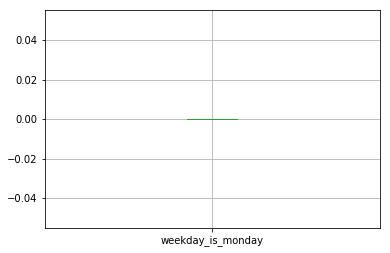

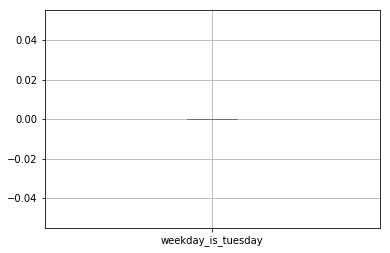

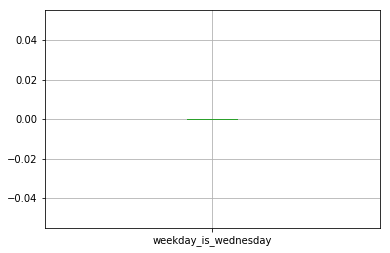

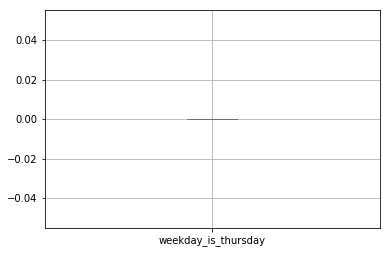

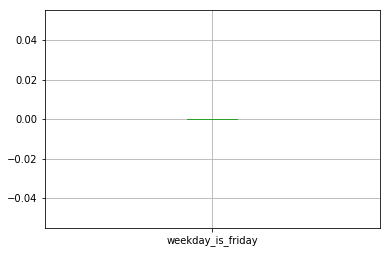

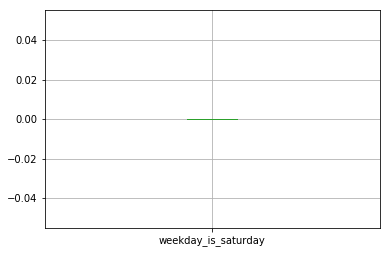

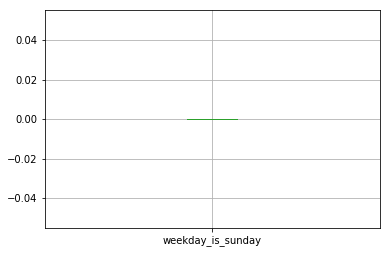

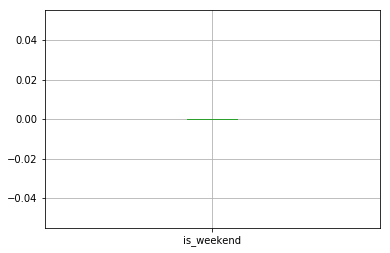

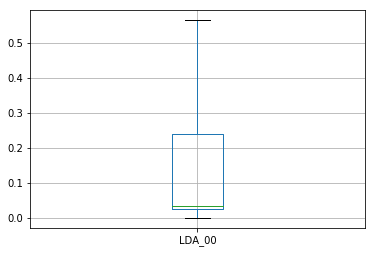

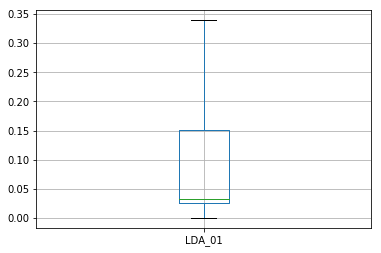

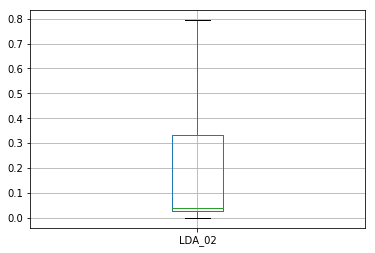

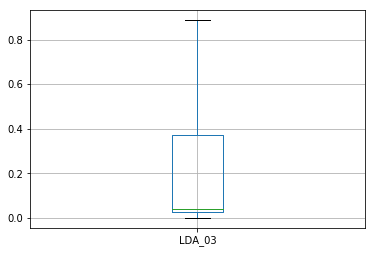

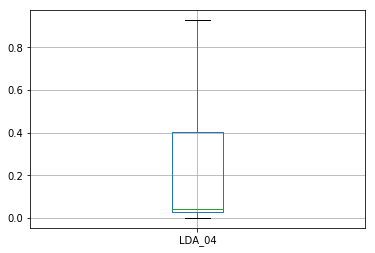

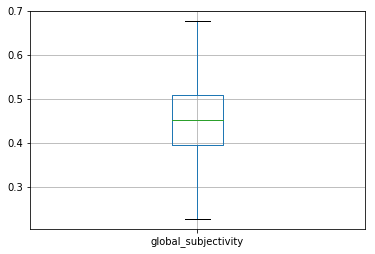

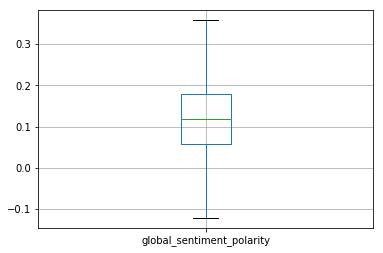

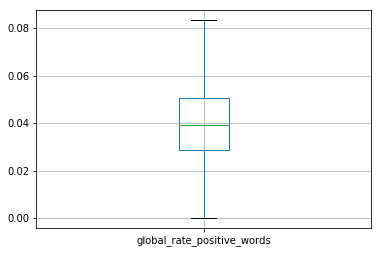

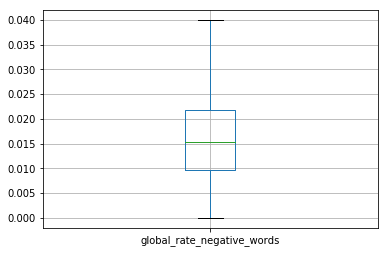

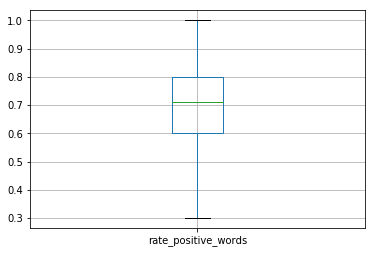

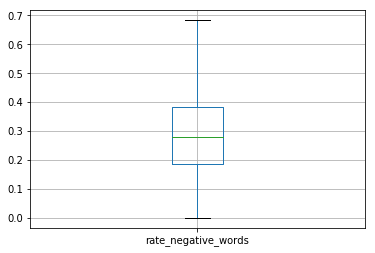

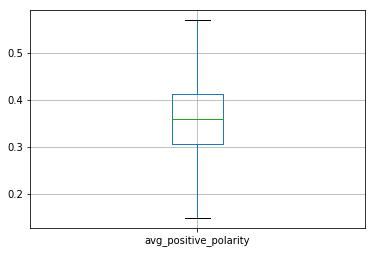

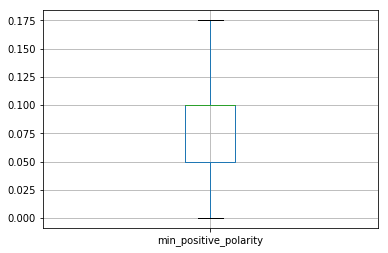

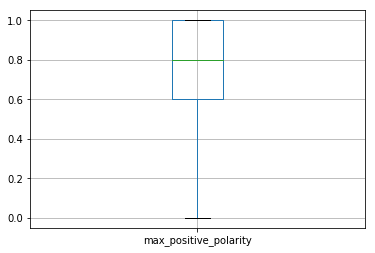

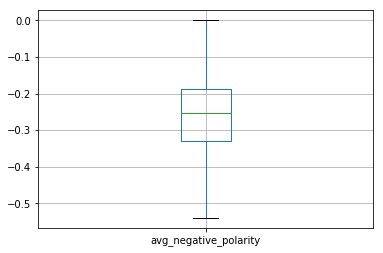

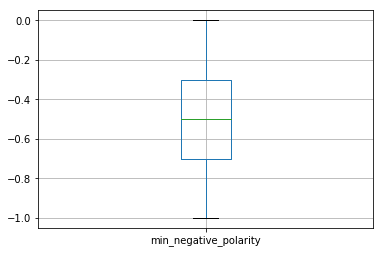

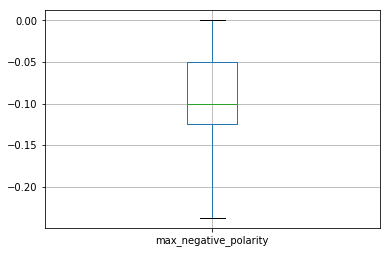

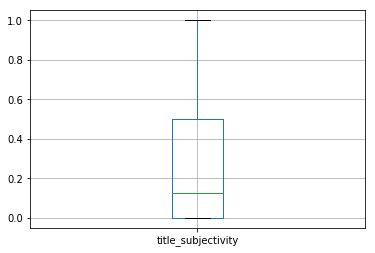

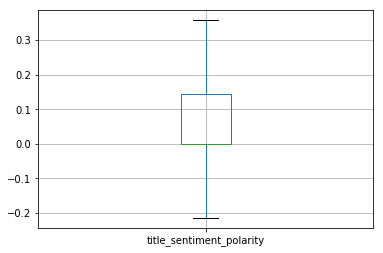

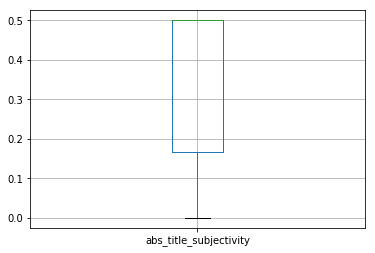

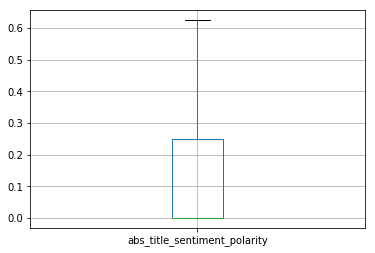

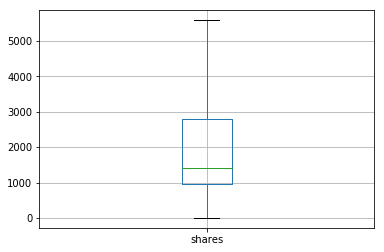

In [10]:
data = pd.DataFrame()
for col in df.columns:
    data[col] = df[col].to_frame()
    #fig = feature.boxplot()
    data[col] = outlier_removal(data[col].to_frame(), col)

    fig = data[col].to_frame().boxplot()
    plt.show()

In [11]:
data.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,31715.000000,31715.000000,31715.000000,3.171500e+04,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,...,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000
mean,10.394198,518.971591,0.538264,1.000000e+00,0.686472,9.999212,2.947154,2.738026,0.536655,4.662382,...,0.087440,0.757242,-0.257123,-0.521935,-0.098076,0.280653,0.062018,0.342450,0.145520,2121.108088
std,2.106626,365.999685,0.110370,3.447561e-09,0.105787,7.785330,2.319137,3.156218,0.799787,0.299453,...,0.045094,0.248184,0.119397,0.289919,0.059633,0.323644,0.161189,0.188618,0.196492,1623.672051
min,4.500000,0.000000,0.264394,1.000000e+00,0.432402,0.000000,0.000000,0.000000,0.000000,3.913368,...,0.000000,0.000000,-0.540060,-1.000000,-0.237500,0.000000,-0.214286,0.000000,0.000000,1.000000
25%,9.000000,247.000000,0.471080,1.000000e+00,0.625791,4.000000,1.000000,1.000000,0.000000,4.478168,...,0.050000,0.600000,-0.328359,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,945.000000
50%,10.000000,410.000000,0.538784,1.000000e+00,0.690476,7.000000,3.000000,1.000000,0.000000,4.664000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608871,1.000000e+00,0.754717,14.000000,4.000000,4.000000,1.000000,4.854701,...,0.100000,1.000000,-0.187226,-0.300000,-0.050000,0.500000,0.142857,0.500000,0.250000,2800.000000
max,16.500000,1419.500000,0.815557,1.000000e+00,0.948106,29.000000,8.500000,8.500000,2.500000,5.419501,...,0.175000,1.000000,0.000000,0.000000,0.000000,1.000000,0.357143,0.500000,0.625000,5582.500000


Now, let's investigate the linear relationship between the predicted variables and the target variable.

In [12]:
# for col in df.columns:
#     df.plot.scatter(x=col, y="shares")
#     plt.show()

In [13]:
X = df.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_tokens_title
Test MSE: 118809775.97113192
Test MSE: 101796008.6352796
count      6343.000000
mean        326.200895
std       10084.921215
min       -3326.620380
25%       -2360.146937
50%       -1842.779720
75%        -389.726607
max      295063.326507
Name: error, dtype: float64
-----------
n_tokens_content
Test MSE: 118788065.54512517
Test MSE: 101964830.55034657
count      6343.000000
mean        328.346961
std       10093.219483
min       -3397.629136
25%       -2362.759301
50%       -1832.629136
75%        -351.825142
max      294985.916043
Name: error, dtype: float64
-----------
n_unique_tokens
Test MSE: 118812002.732686
Test MSE: 101801858.86542273
count      6343.000000
mean        325.508163
std       10085.233691
min       -3271.048679
25%       -2353.548496
50%       -1897.205232
75%        -398.904473
max      295100.824810
Name: error, dtype: float64
-----------


/home/thallessilva/Desktop/workspace/venv/py3/lib/python3.5/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


n_non_stop_words
Test MSE: 118812144.90200439
Test MSE: 101801874.29331501
count      6343.000000
mean        325.469163
std       10085.235715
min       -3271.165858
25%       -2353.665858
50%       -1897.630802
75%        -399.165858
max      295100.834142
Name: error, dtype: float64
-----------
n_non_stop_unique_tokens
Test MSE: 118812152.83129126
Test MSE: 101801990.07933512
count      6343.000000
mean        325.466923
std       10085.241529
min       -3271.391594
25%       -2353.662000
50%       -1897.533952
75%        -399.051949
max      295100.966798
Name: error, dtype: float64
-----------
num_hrefs
Test MSE: 118675904.05765866
Test MSE: 101348664.7263282
count      6343.000000
mean        320.505415
std       10062.897463
min       -6439.579093
25%       -2298.084593
50%       -1805.681357
75%        -382.510807
max      294964.125115
Name: error, dtype: float64
-----------
num_self_hrefs
Test MSE: 118811758.55505842
Test MSE: 101795673.46000169
count      6343.000000
mean   

/home/thallessilva/Desktop/workspace/venv/py3/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


count      6343.000000
mean        326.398435
std       10069.318292
min       -4927.199430
25%       -2337.174836
50%       -1736.849516
75%        -319.480794
max      294262.221341
Name: error, dtype: float64
-----------
kw_min_avg
Test MSE: 118542375.25157806
Test MSE: 101771623.0882793
count      6343.000000
mean        323.025884
std       10083.814167
min       -4250.492283
25%       -2325.020031
50%       -1689.910326
75%        -389.910326
max      295610.089674
Name: error, dtype: float64
-----------
kw_max_avg
Test MSE: 118120797.08596365
Test MSE: 101036647.4212305
count      6343.000000
mean        306.095248
std       10047.829104
min      -26932.836344
25%       -2232.425516
50%       -1731.323373
75%        -358.385791
max      295316.726291
Name: error, dtype: float64
-----------
kw_avg_avg
Test MSE: 117009631.71207531
Test MSE: 99739687.73764238
count      6343.000000
mean        300.174996
std        9983.250741
min      -27709.535643
25%       -2139.980422
50%      

count      6343.000000
mean        323.347580
std       10078.070533
min       -3494.705026
25%       -2346.233975
50%       -1835.291872
75%        -388.027397
max      294848.294974
Name: error, dtype: float64
-----------
max_negative_polarity
Test MSE: 118735191.00375533
Test MSE: 101739591.02851711
count      6343.000000
mean        321.962545
std       10082.259518
min       -5280.131739
25%       -2343.262944
50%       -1824.918489
75%        -369.105143
max      295048.628174
Name: error, dtype: float64
-----------
title_subjectivity
Test MSE: 118785172.52275474
Test MSE: 101636378.09510921
count      6343.000000
mean        324.912890
std       10077.044159
min       -3419.794140
25%       -2343.886505
50%       -1856.386505
75%        -383.687293
max      294887.205860
Name: error, dtype: float64
-----------
title_sentiment_polarity
Test MSE: 118801051.74571101
Test MSE: 101752932.06522742
count      6343.000000
mean        325.244345
std       10082.815867
min       -3442.037

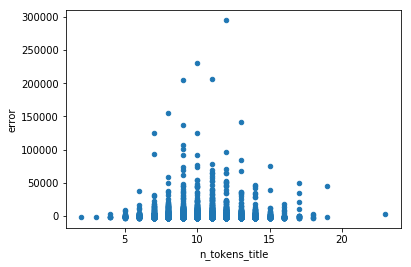

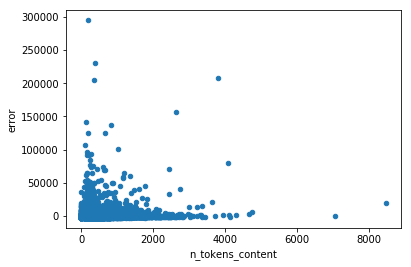

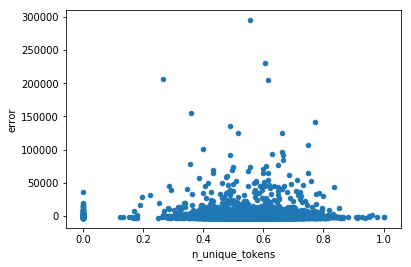

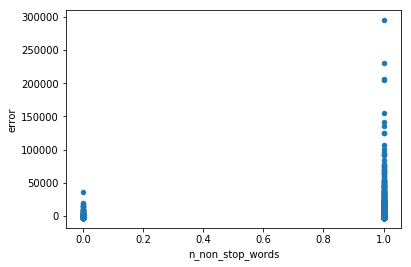

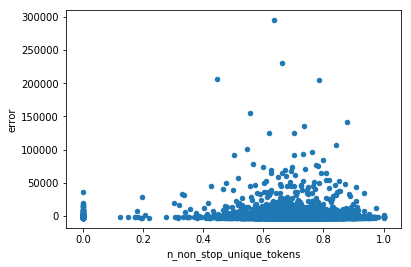

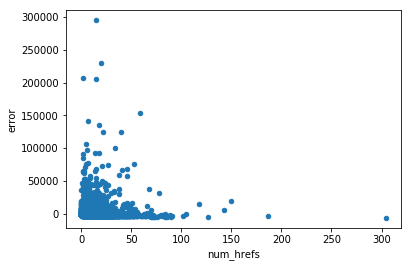

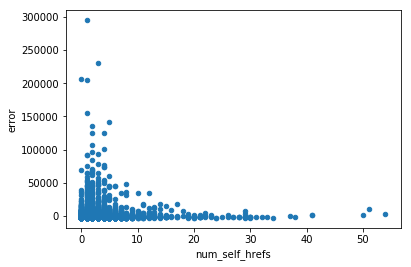

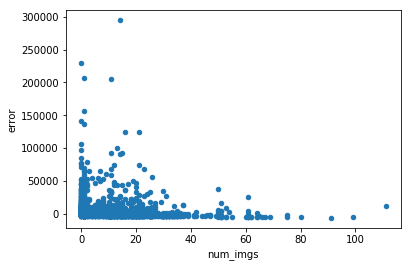

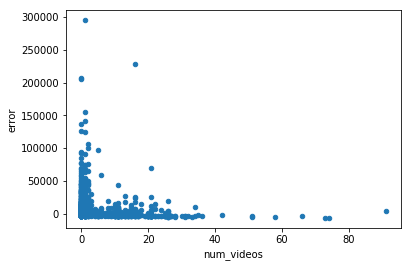

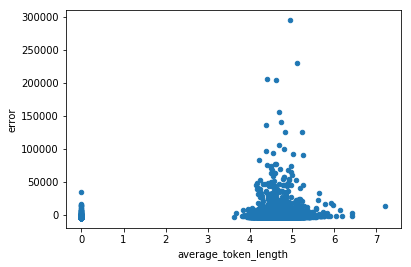

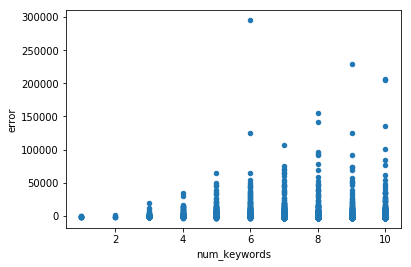

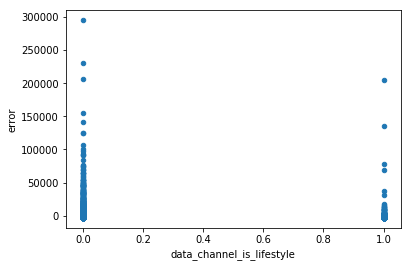

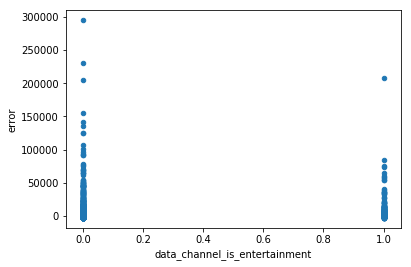

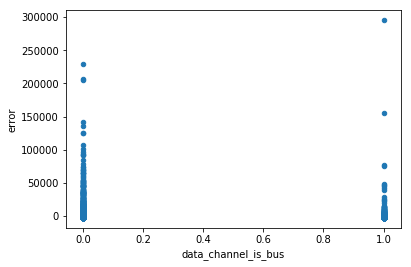

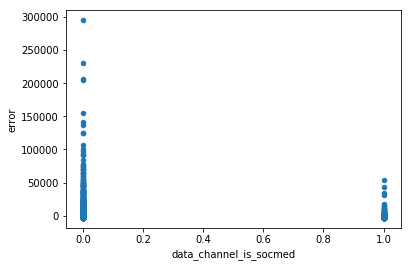

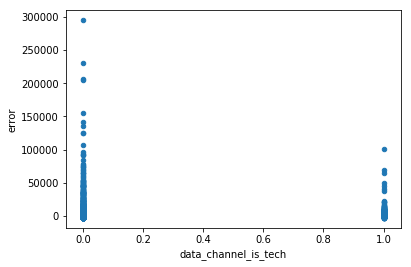

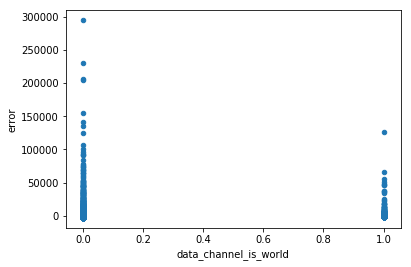

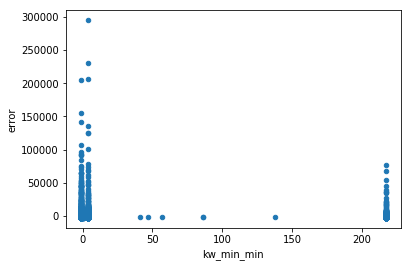

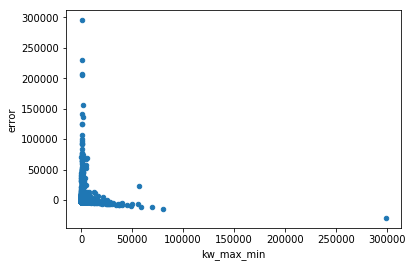

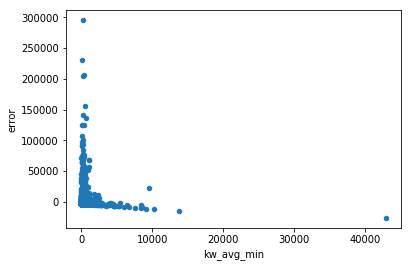

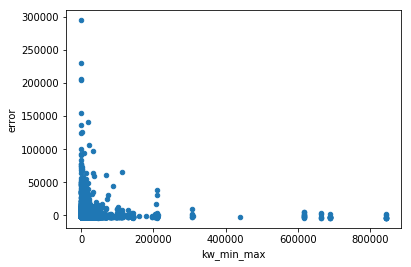

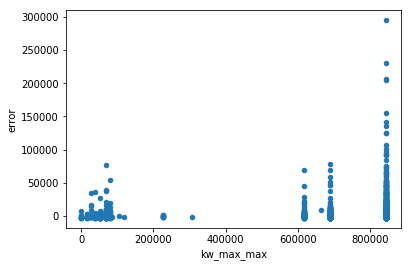

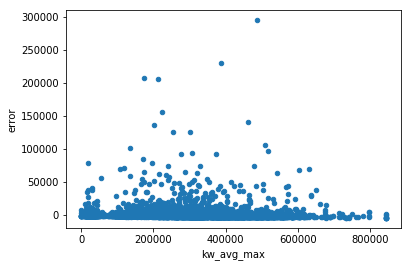

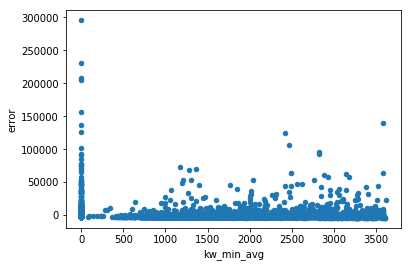

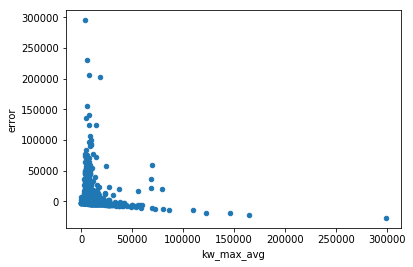

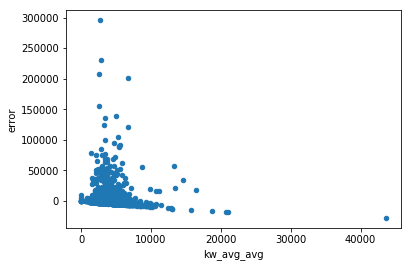

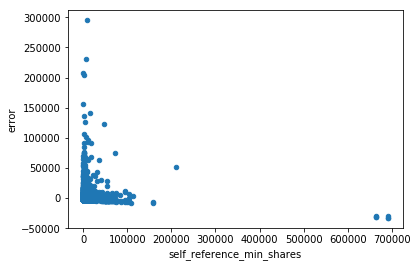

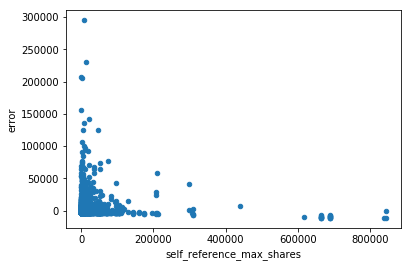

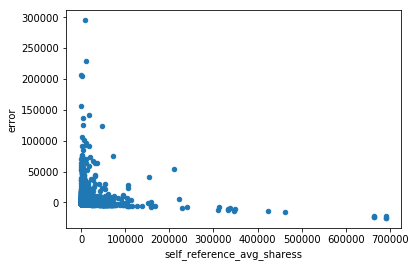

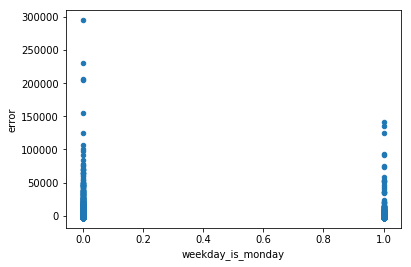

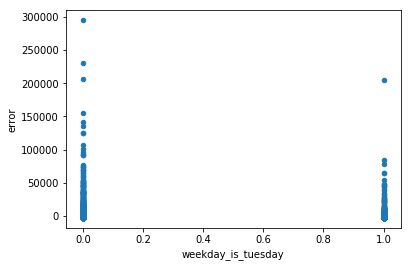

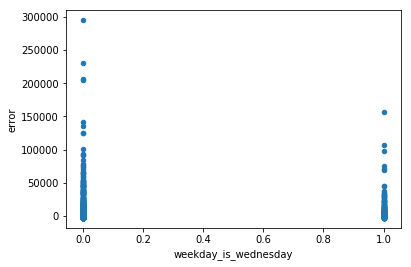

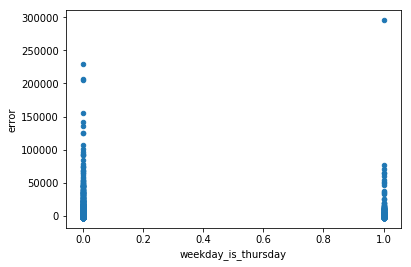

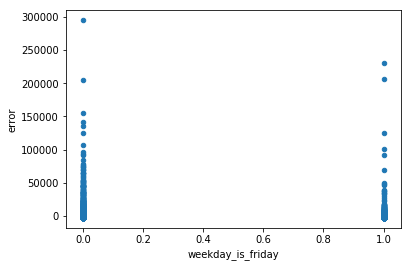

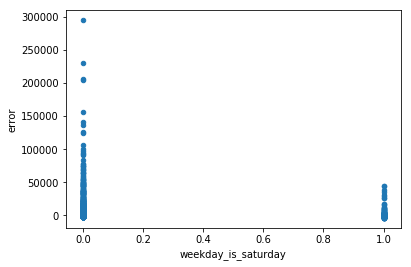

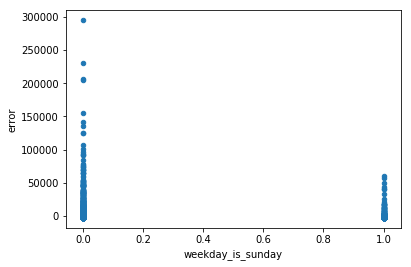

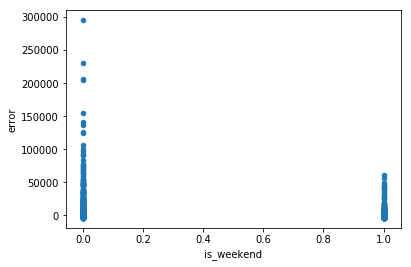

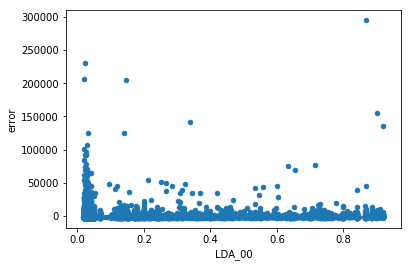

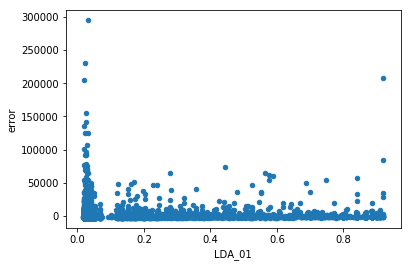

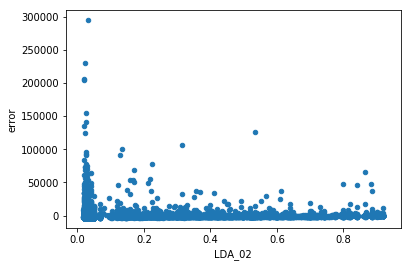

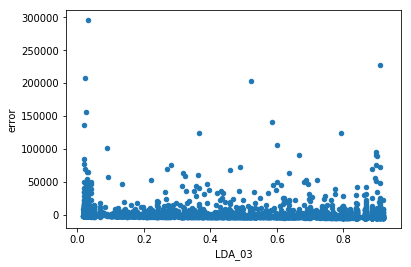

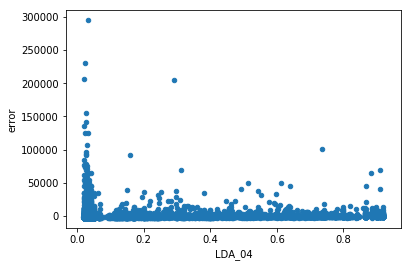

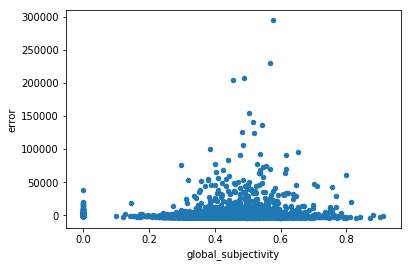

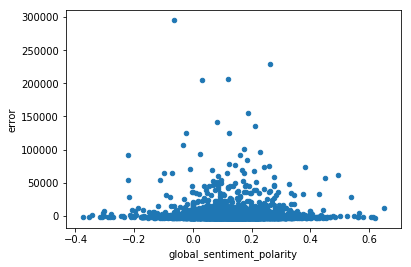

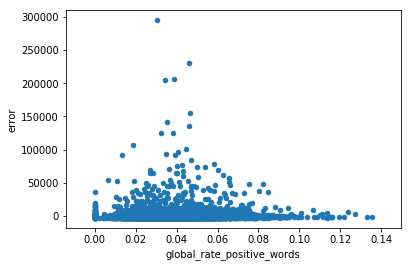

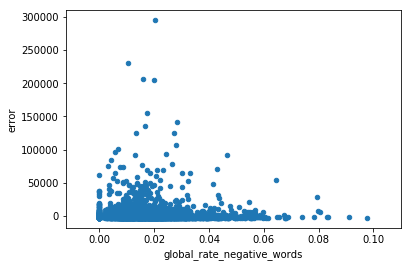

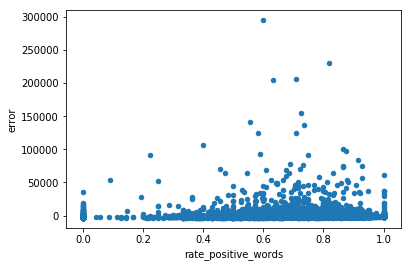

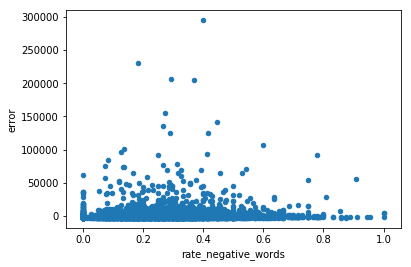

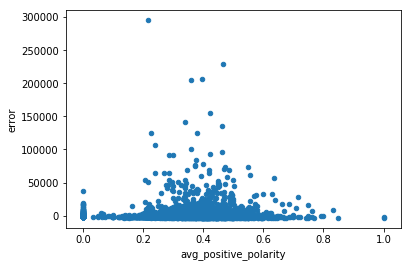

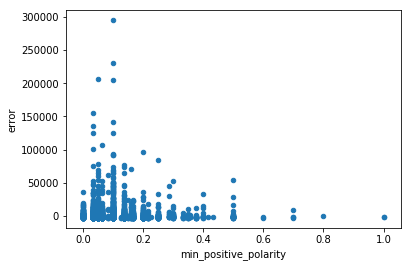

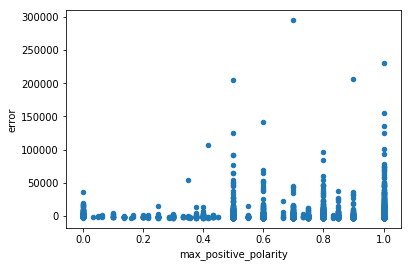

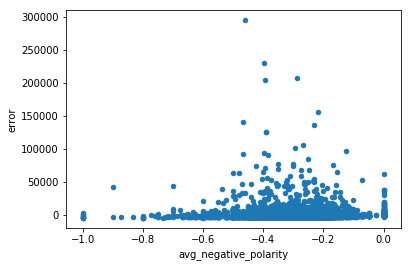

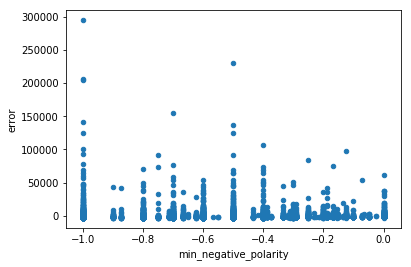

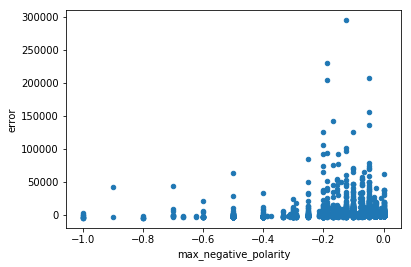

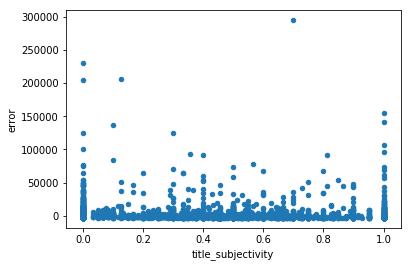

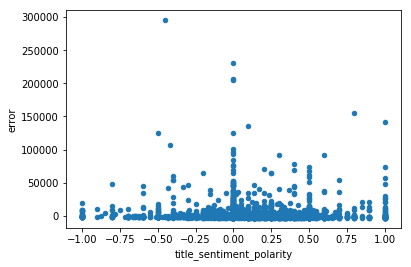

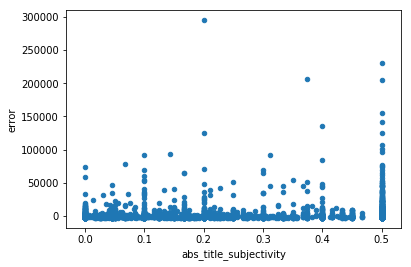

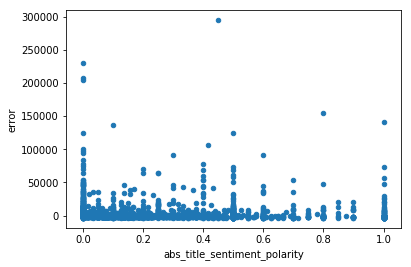

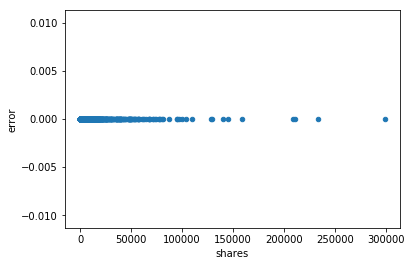

In [14]:
#col = "n_tokens_title"

for col in df.columns:
    print(col)
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train[col].to_frame(), y_train)

    pred = regr.predict(X_train[col].to_frame())
    print("Test MSE:", mean_squared_error(y_train, pred))

    pred = regr.predict(X_test[col].to_frame())
    print("Test MSE:", mean_squared_error(y_test, pred))

    X_test['error'] = X_test.shares - pred.squeeze()
    print(X_test['error'].describe())
    print("-----------")
    X_test.plot.scatter(x=col, y='error')